In [2]:
import pandas as pd

# importing dataset 
data = pd.read_csv('house.csv')

# dropping the null values
data.dropna(inplace=True)

<AxesSubplot:>

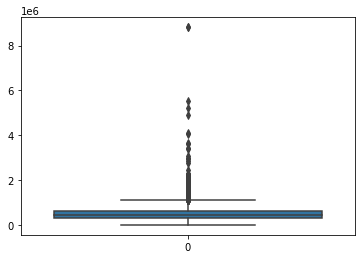

In [6]:
# importing the module
import seaborn as sns


# plot plot to visualize outliers
sns.boxplot( data=data['price'])

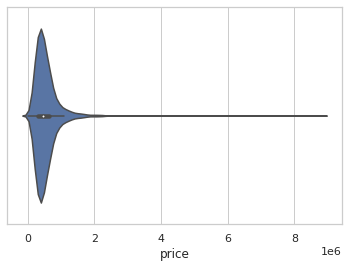

In [7]:
# setting the theme of the violin plot
sns.set_theme(style="whitegrid")

# plotting the violin plot
ax = sns.violinplot(x=data['price'])

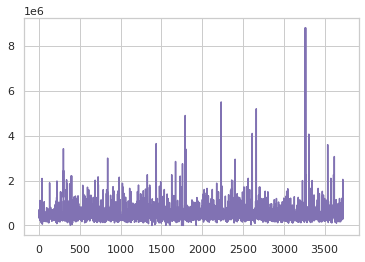

In [11]:
# importing the module
import matplotlib.pyplot as plt

# plotting scattered plot
plt.plot([i for i in range(len(data.price))], data.price , c ='m')

In [40]:
# data
data = [[10, 20], [20, 30], [30, 40], [40, 50], [50, 60]]

# importing pandas
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['input', 'output'])

# datahead
df.head()

,input,output
0,10,20
1,20,30
2,30,40
3,40,50
4,50,60


In [41]:
# Splitting the dataset into the Training data set and Testing data set
from sklearn.model_selection import train_test_split

# 20% data for testing, random state 1
X_train, X_test, y_train, y_test = train_test_split(df.input, df.output, train_size=.8, random_state=1)

1    30
4    60
0    20
3    50
Name: output, dtype: int64

In [45]:


# Importing linear regression form sklear
from sklearn.linear_model import LinearRegression

# initializing the algorithm
regressor = LinearRegression()

# Fitting Simple Linear Regression to the Training set
regressor.fit([X_train], [y_train])

LinearRegression()

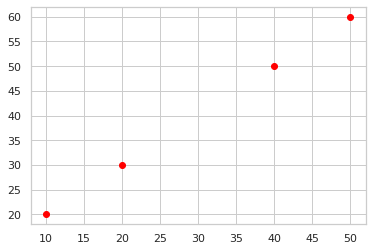

In [47]:
# ploting the training dataset in scattered graph
plt.scatter([X_train], [y_train], color='red')

# ploting the testing dataset in line line
plt.plot([X_train], regressor.predict([X_train]), color='blue')

array([[20., 30., 40., 50., 60.]])